In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix 
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**Data Preprocessing**

The readings from the accelerometers  and  gyroscope  measurements  from  the  lowerlimb are taken in a rate of 40 Hz on theother hand the labels were done in a rate of 10 Hz. Training Dataset was made with data from 8 subjects. Shown for one subject.

In [ ]:
x_time = pd.read_csv('TrainingData/subject_001_01__x_time.csv', header=None)
x = pd.read_csv('TrainingData/subject_001_01__x.csv', header=None)
y_time = pd.read_csv('TrainingData/subject_001_01__y_time.csv', header=None)
y = pd.read_csv('TrainingData/subject_001_01__y.csv', header=None)

In [ ]:
x_time_v=x_time.to_numpy()
y_time_v = y_time.to_numpy()
x_v = x.to_numpy()
y_v = y.to_numpy()

In [ ]:
all_y_v = []
x_count = 0
for i, time in enumerate(y_time_v):
    while x_time_v[x_count] < time:
        all_y_v.append(y_v[i])
        x_count += 1

**Data Augmentation:**

The final daset has 1341646 samples from 8 subject but the data is imbalanced. For balancing the dataset Synthetic Minority Oversampling Technique (SMOTE) was used to undersample and oversample some classes. [Ref: https://machinelearningmastery.com/multi-class-imbalanced-classification/]

Class=0, n=1006926 (75.052%)
Class=1, n=55216 (4.116%)
Class=2, n=73068 (5.446%)
Class=3, n=206436 (15.387%)


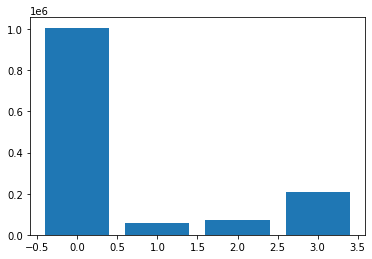

In [4]:
df = pd.read_csv('dataset.csv')
df.head
y=df['y']
X = df.iloc[:,1:-1]
#y=df.iloc[:,-1:]
counter = Counter(y)

for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=0, n=251732 (25.000%)
Class=1, n=251732 (25.000%)
Class=2, n=251731 (25.000%)
Class=3, n=251731 (25.000%)


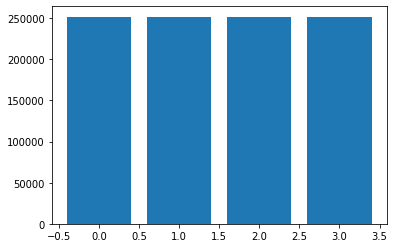

In [6]:
#X, y = df[:, :-1], df[:, -1]
y = LabelEncoder().fit_transform(y)
strategy = {1:251732, 2:251731, 3:251731}
oversample = SMOTE(sampling_strategy=strategy)
#oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
strategy={0:251732}
under = RandomUnderSampler({0:251732})
X, y = under.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
#print(counter)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [10]:
clf = RandomForestClassifier(max_depth=30, random_state=0)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
y_pred = clf.predict(X_test)

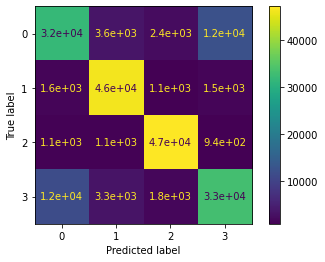

In [13]:
plot_confusion_matrix(clf, X_test, y_test)

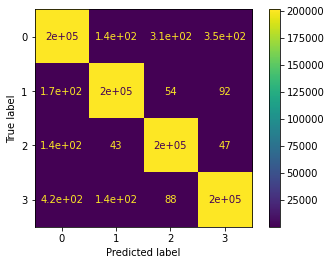

In [16]:
plot_confusion_matrix(clf, X_train, y_train)

In [19]:
accuracy_score(y_test, y_pred)

0.7881729613776529